Movie Studio Analysis

Overview

Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

In the last 10 years, which genre was the most profitable at the box office. profits between genres. 

Most popular english movies filtered by user rating???
filters - year, english, gross profit, user rating, best director
3 recommendations?
comedy vs drama


** to make 2x to 3x more profit 
set budget = movies under between 5-80 million, medium budget movies
genre of movies - filter

Data Understanding

In [59]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns

import sqlite3
import zipfile 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Read in movie budgets dataset
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [13]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
#create new column release year from release date
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(int)
movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [15]:
#create new column release_month from release date
movie_budgets['release_month'] = movie_budgets['release_date'].str.split().str[0]
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


In [16]:
#filter for release year equal and above 2000
movie_budgets_filtered = movie_budgets[movie_budgets['release_year'] >= 2000]
movie_budgets_filtered 


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,2004,Dec
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


In [17]:
# Remove the dollar sign and commas, then convert the values to integers for production_budget
movie_budgets_filtered['production_budget'] = movie_budgets_filtered['production_budget'].astype(str)
movie_budgets_filtered['production_budget'] = movie_budgets_filtered['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

movie_budgets_filtered


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,$900,$900,2004,Dec
5777,78,"Dec 31, 2018",Red 11,7000,$0,$0,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,$0,2015,Sep


In [32]:
# Remove the dollar sign and commas, then convert the values to integers for worldwide_gross
movie_budgets_filtered['worldwide_gross'] = movie_budgets_filtered['worldwide_gross'].astype(str)
movie_budgets_filtered['worldwide_gross'] = movie_budgets_filtered['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

movie_budgets_filtered


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,2017,Dec
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,$900,900,2004,Dec
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,2015,Sep


In [33]:
#create ROI column
movie_budgets_filtered['ROI'] = (movie_budgets_filtered['worldwide_gross'] / movie_budgets_filtered['production_budget']) * 100
movie_budgets_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2009,Dec,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,2011,May,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,2019,Jun,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,2015,May,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,2017,Dec,415.369636
...,...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,$900,900,2004,Dec,12.857143
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,2018,Dec,0.000000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,2005,Jul,26.760000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,2015,Sep,0.000000


In [34]:
#filtering ROI above 200.0
movie_budgets_filtered = movie_budgets_filtered[movie_budgets_filtered["ROI"] >= 200.0]
movie_budgets_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2009,Dec,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,2011,May,254.667286
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,2015,May,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,2017,Dec,415.369636
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,2015,Dec,671.016739
...,...,...,...,...,...,...,...,...,...
5766,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000
5767,68,"Jul 6, 2001",Cure,10000,"$94,596",94596,2001,Jul,945.960000
5774,75,"Oct 8, 2004",Primer,7000,"$424,760",841926,2004,Oct,12027.514286
5775,76,"May 26, 2006",Cavite,7000,"$70,071",71644,2006,May,1023.485714


In [35]:
# Filter rows where the production_budget is less than or equal to 80 million
budgets = movie_budgets_filtered[movie_budgets_filtered['production_budget'] <= 80000000]
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, 537 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1547 non-null   int64  
 1   release_date       1547 non-null   object 
 2   movie              1547 non-null   object 
 3   production_budget  1547 non-null   int64  
 4   domestic_gross     1547 non-null   object 
 5   worldwide_gross    1547 non-null   int64  
 6   release_year       1547 non-null   int64  
 7   release_month      1547 non-null   object 
 8   ROI                1547 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 120.9+ KB


In [36]:
# Connect and Read in SQL tables
conn = sqlite3.connect('im.db.zip')
zip_file_path = 'data/im.db.zip'

with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

database_path = 'unzippedData/im.db'
conn = sqlite3.connect(database_path)

In [37]:
schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)

schema_df


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [38]:
# reading the movie_basics table
movie_basics = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    WHERE start_year <= 2020
    """, conn
)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146013,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146014,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146015,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146016,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [39]:
# joining csv file and sql table together
merged_df = pd.merge(budgets, movie_basics, left_on='movie', right_on='original_title', how='inner')
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"
1,39,"May 26, 2011",The Hangover Part II,80000000,"$254,464,305",586464305,2011,May,733.080381,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery"
2,41,"Feb 10, 2017",The Lego Batman Movie,80000000,"$175,750,384",310660018,2017,Feb,388.325022,tt4116284,The Lego Batman Movie,The Lego Batman Movie,2017,104.0,"Action,Animation,Comedy"
3,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,"$169,700,110",469500298,2015,Sep,586.875373,tt2510894,Hotel Transylvania 2,Hotel Transylvania 2,2015,89.0,"Animation,Comedy,Family"
4,48,"Jul 12, 2013",Grown Ups 2,80000000,"$133,668,525",247023808,2013,Jul,308.779760,tt2191701,Grown Ups 2,Grown Ups 2,2013,101.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt2782686,Exeter,Exeter,2014,NaN,Horror
1019,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt4931374,Exeter,Exeter,2015,92.0,None
1020,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"
1021,68,"Jul 6, 2001",Cure,10000,"$94,596",94596,2001,Jul,945.960000,tt1872026,Cure,Cure,2011,93.0,Drama


In [40]:
#drop duplicates from dataset
df_deduplicated = merged_df.drop_duplicates(subset=['movie'])
df_deduplicated 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"
1,39,"May 26, 2011",The Hangover Part II,80000000,"$254,464,305",586464305,2011,May,733.080381,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery"
2,41,"Feb 10, 2017",The Lego Batman Movie,80000000,"$175,750,384",310660018,2017,Feb,388.325022,tt4116284,The Lego Batman Movie,The Lego Batman Movie,2017,104.0,"Action,Animation,Comedy"
3,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,"$169,700,110",469500298,2015,Sep,586.875373,tt2510894,Hotel Transylvania 2,Hotel Transylvania 2,2015,89.0,"Animation,Comedy,Family"
4,48,"Jul 12, 2013",Grown Ups 2,80000000,"$133,668,525",247023808,2013,Jul,308.779760,tt2191701,Grown Ups 2,Grown Ups 2,2013,101.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,38,"Mar 18, 2016",Krisha,30000,"$144,822",144822,2016,Mar,482.740000,tt4266638,Krisha,Krisha,2015,83.0,Drama
1015,48,"Jan 14, 2000",The Terrorist,25000,"$195,043",195043,2000,Jan,780.172000,tt1737110,The Actor,The Terrorist,2018,86.0,"Romance,Thriller"
1017,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller"
1020,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"


In [50]:
# create new df to match goknur's df, right join on primary_title
merged_df_copy = pd.merge(budgets, movie_basics, left_on='movie', right_on='primary_title', how='inner')
merged_df_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"
1,39,"May 26, 2011",The Hangover Part II,80000000,"$254,464,305",586464305,2011,May,733.080381,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery"
2,41,"Feb 10, 2017",The Lego Batman Movie,80000000,"$175,750,384",310660018,2017,Feb,388.325022,tt4116284,The Lego Batman Movie,The Lego Batman Movie,2017,104.0,"Action,Animation,Comedy"
3,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,"$169,700,110",469500298,2015,Sep,586.875373,tt2510894,Hotel Transylvania 2,Hotel Transylvania 2,2015,89.0,"Animation,Comedy,Family"
4,48,"Jul 12, 2013",Grown Ups 2,80000000,"$133,668,525",247023808,2013,Jul,308.779760,tt2191701,Grown Ups 2,Grown Ups 2,2013,101.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt2782686,Exeter,Exeter,2014,NaN,Horror
1079,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt4931374,Exeter,Exeter,2015,92.0,None
1080,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"
1081,68,"Jul 6, 2001",Cure,10000,"$94,596",94596,2001,Jul,945.960000,tt1872026,Cure,Cure,2011,93.0,Drama


In [51]:
#drop duplicates from new df
merge_copy = merged_df_copy.drop_duplicates(subset=['movie'])
merge_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"
1,39,"May 26, 2011",The Hangover Part II,80000000,"$254,464,305",586464305,2011,May,733.080381,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery"
2,41,"Feb 10, 2017",The Lego Batman Movie,80000000,"$175,750,384",310660018,2017,Feb,388.325022,tt4116284,The Lego Batman Movie,The Lego Batman Movie,2017,104.0,"Action,Animation,Comedy"
3,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,"$169,700,110",469500298,2015,Sep,586.875373,tt2510894,Hotel Transylvania 2,Hotel Transylvania 2,2015,89.0,"Animation,Comedy,Family"
4,48,"Jul 12, 2013",Grown Ups 2,80000000,"$133,668,525",247023808,2013,Jul,308.779760,tt2191701,Grown Ups 2,Grown Ups 2,2013,101.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,38,"Mar 18, 2016",Krisha,30000,"$144,822",144822,2016,Mar,482.740000,tt4266638,Krisha,Krisha,2015,83.0,Drama
1076,48,"Jan 14, 2000",The Terrorist,25000,"$195,043",195043,2000,Jan,780.172000,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller
1077,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller"
1080,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"


In [54]:
#Rename the dataframe to appropriate name and save cleaned dataset as CSV
movie_df = merge_copy
movie_df.to_csv('data/movie.df.csv', index=False)

In [43]:
df_deduplicated["genres"].value_counts()

genres
Drama                           41
Comedy,Drama,Romance            33
Comedy,Drama                    33
Documentary                     27
Horror,Mystery,Thriller         26
                                ..
Biography,Comedy,Documentary     1
Romance,Sci-Fi,Thriller          1
Music                            1
Action,Comedy,Documentary        1
Comedy,Drama,Horror              1
Name: count, Length: 172, dtype: int64

# **Optional Genre Filter**

In [49]:
# OPTIONAL 
Make a copy of df_deduplicated
# df_copy = df_deduplicated.copy()

# Split the 'genres' column into lists in the copied DataFrame
df_copy['genres'] = df_copy['genres'].str.split(',')

# Explode the 'genres' column in the copied DataFrame
df_exploded = df_copy.explode('genres')

df_exploded

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,Action
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,Adventure
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,Sci-Fi
1,39,"May 26, 2011",The Hangover Part II,80000000,"$254,464,305",586464305,2011,May,733.080381,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,Comedy
1,39,"May 26, 2011",The Hangover Part II,80000000,"$254,464,305",586464305,2011,May,733.080381,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt1945044,Exeter,Exeter,2015,91.0,Thriller
1020,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,Comedy
1020,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,Drama
1020,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,Horror


In [48]:
# Split each string on the comma, explode the resulting lists into separate rows, and then count the values
individual_genre_counts = df_deduplicated['genres'].str.split(',').explode().value_counts()
individual_genre_counts.value_counts


<bound method IndexOpsMixin.value_counts of genres
Drama          376
Comedy         266
Thriller       135
Action         133
Romance        113
Horror         107
Crime           98
Adventure       84
Mystery         81
Biography       69
Documentary     51
Sci-Fi          42
Family          38
Fantasy         35
Animation       31
Music           28
History         19
War             10
Sport           10
Western          2
Musical          2
Name: count, dtype: int64>

# Statstical Analysis 

In [55]:
#main dataset to do further anaylsis.
movie_df 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,"$408,010,692",677923379,2012,Mar,847.404224,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"
1,39,"May 26, 2011",The Hangover Part II,80000000,"$254,464,305",586464305,2011,May,733.080381,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery"
2,41,"Feb 10, 2017",The Lego Batman Movie,80000000,"$175,750,384",310660018,2017,Feb,388.325022,tt4116284,The Lego Batman Movie,The Lego Batman Movie,2017,104.0,"Action,Animation,Comedy"
3,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,"$169,700,110",469500298,2015,Sep,586.875373,tt2510894,Hotel Transylvania 2,Hotel Transylvania 2,2015,89.0,"Animation,Comedy,Family"
4,48,"Jul 12, 2013",Grown Ups 2,80000000,"$133,668,525",247023808,2013,Jul,308.779760,tt2191701,Grown Ups 2,Grown Ups 2,2013,101.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,38,"Mar 18, 2016",Krisha,30000,"$144,822",144822,2016,Mar,482.740000,tt4266638,Krisha,Krisha,2015,83.0,Drama
1076,48,"Jan 14, 2000",The Terrorist,25000,"$195,043",195043,2000,Jan,780.172000,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller
1077,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,Sep,1959.168000,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller"
1080,67,"Apr 28, 2006",Clean,10000,"$138,711",138711,2006,Apr,1387.110000,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"


In [68]:
#calculate central tendency measures - mean, median, mode
movie_df['ROI'].describe()

count      731.000000
mean       727.435331
std       1741.447238
min        200.703767
25%        274.247907
50%        406.245845
75%        722.954924
max      41656.474000
Name: ROI, dtype: float64

In [ ]:
# Create new variable to 
top_10_genres = []
for k in

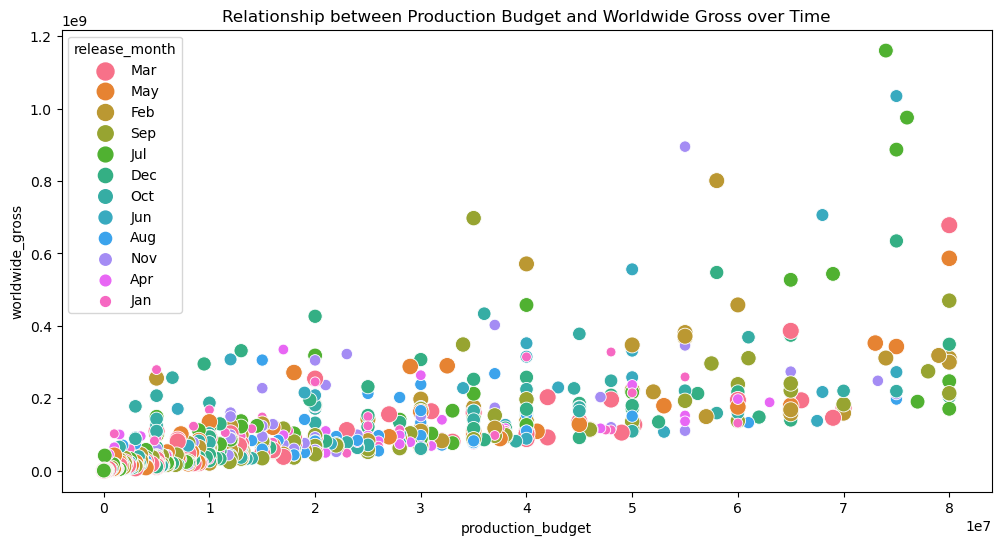

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='production_budget', y='worldwide_gross', hue='release_month', data=movie_df, size='release_month', sizes=(50, 150), legend="full")

plt.title('Relationship between Production Budget and Worldwide Gross over Time')
plt.show()